<a href="https://colab.research.google.com/github/mmrepos/CS6375.MU1-Machine_Learning-Su22/blob/main/Assignment2/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#####################################################################################################################
#
#   Neural Network Analysis
#   Need to have numpy and pandas installed before running this code.
#   Need to complete all TODO marked sections
#
#####################################################################################################################

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import warnings
import matplotlib.pyplot as plt

Activation =logistic
epochs train      test       train         test      
       accuracy   accuracy    MSE          MSE  
100   0.2629978   0.2559167  905.3619428   933.70031
200   0.2804391   0.2713145  1145.8881760  1145.91474
300   0.2910370   0.2754491  927.7145709   979.73681
400   0.3002091   0.2925577  1346.7522574  1340.76105
500   0.2973101   0.2850014  1037.0666286  1085.44055
600   0.3408421   0.3374679  1557.0561258  1551.87140
Activation =tanh
epochs train      test       train         test      
       accuracy   accuracy    MSE          MSE  
100   0.3035358   0.2919875  782.2162342   821.59053
200   0.3028229   0.2995438  1493.5707157  1501.23011
300   0.3245889   0.3279156  1249.3691664  1262.05632
400   0.3522954   0.3433134  740.1536451   717.86727
500   0.3390362   0.3360422  1537.9229636  1536.94197
600   0.3491588   0.3391788  793.6567817   802.98546
Activation =relu
epochs train      test       train         test      
       accuracy   accuracy    MSE         

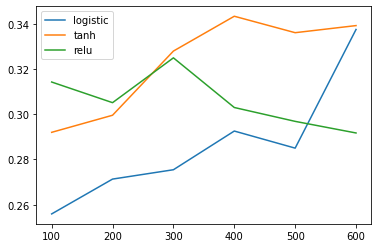

In [ ]:
class NeuralNet:
    def __init__(self, dataFile, header=True):
        self.raw_input = pd.read_csv(dataFile, header=None, usecols=[0, 1, 2, 3, 4, 5, 6])

    # TODO: Write code for pre-processing the dataset, which would include
    # standardization, normalization,
    # categorical to numerical, etc
    def preprocess(self):
        result = []
        number_dict = {"zero": 0, "one": 1, "two": 2, "three": 3, "four": 4, "five": 5, "six": 6,
                       "seven": 7, "eight": 8, "nine": 9, "ten": 10, "eleven": 11, "twelve": 12,
                       "thirteen": 13, "fourteen": 14, "fifteen": 15, "sixteen": 16, "draw": 107}

        for index, row in self.raw_input.iterrows():
            new_row = []
            # new_row.append(ord(row[0]) - ord('a'))
            # new_row.append(row[1])
            # new_row.append(ord(row[2]) - ord('a'))
            # new_row.append(row[3])
            # new_row.append(ord(row[4]) - ord('a'))
            # new_row.append(row[5])
            new_row.append(ord(row[0]) - ord('a') + row[1] * 8)
            new_row.append(ord(row[2]) - ord('a') + row[3] * 8)
            new_row.append(ord(row[4]) - ord('a') + row[5] * 8)
            new_row.append(number_dict[row[6]])
            result.append(new_row)
        self.processed_data = pd.DataFrame.from_records(result)

        return 0

    # TODO: Train and evaluate models for all combinations of parameters
    # specified. We would like to obtain following outputs:
    #   1. Training Accuracy and Error (Loss) for every model
    #   2. Test Accuracy and Error (Loss) for every model
    #   3. History Curve (Plot of Accuracy against training steps) for all
    #      the models in a single plot. The plot should be color coded i.e.
    #      different color for each model. (Plot the model history for all the
    #       cases on a single plot.)

    def train_evaluate(self):
        ncols = len(self.processed_data.columns)
        nrows = len(self.processed_data.index)
        X = self.processed_data.iloc[:, 0:(ncols - 1)]
        y = self.processed_data.iloc[:, (ncols - 1)]
        X_train, X_test, y_train, y_test = train_test_split(
            X, y)

        # Below are the hyperparameters needed to use for model
        # evaluation
        activations = ['logistic', 'tanh', 'relu']
        learning_rate = [0.01, 0.1]
        max_iterations = [100, 200, 300, 400, 500, 600]  # also known as epochs
        num_hidden_layers = [7, 5]

        # Create the neural network and keep track of the performance
        # metrics
        y_test = y_test.values.tolist()
        warnings.simplefilter("ignore")
        graphList = []
        for current_activation in activations:
            print("Activation =" + current_activation)
            print('epochs train      test       train         test      ')
            print('       accuracy   accuracy    MSE          MSE  ')
            row=[]
            for epochs in max_iterations:
                clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=num_hidden_layers, activation=current_activation,
                                    max_iter=epochs)
                clf.fit(X_train, y_train)
                y_train_predicted = clf.predict(X_train)
                y_predicted = clf.predict(X_test)
                row.append( accuracy_score(y_predicted, y_test))
                print("{0}  {1:10.7f}  {2:10.7f}  {3:10.7f}  {4:10.5f}".format(epochs, accuracy_score(y_train_predicted, y_train),
                                                   accuracy_score(y_predicted, y_test)
                                                   , mean_squared_error(y_train_predicted, y_train),
                                                   mean_squared_error(y_predicted, y_test)))
            graphList.append(row)

        # Plot the model history for each model in a single plot
        # model history is a plot of accuracy vs number of epochs in every case
        # Create a large sized plot to show multiple lines in a same figure.
        # Output a table of results containing following columns: 
        # model hyperparameters, training and test accuracies, and training
        # and test errors (e.g. mean squared error)
        print(graphList)
        plt.plot(max_iterations, graphList[0], max_iterations,graphList[1], max_iterations,graphList[2])
        plt.legend(['logistic', 'tanh', 'relu'])
        plt.show()

        return 0


if __name__ == "__main__":
    neural_network = NeuralNet("https://archive.ics.uci.edu/ml/machine-learning-databases/chess/king-rook-vs-king/krkopt.data")  # put in path to your file
    neural_network.preprocess()
    neural_network.train_evaluate()